In [1]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

# from omnilearn import util

from ew_etfs import *
from ew_etfs import INDEX, ETF, CACHE


In [2]:
sum(x['ratio'] for x in aex)

0.9846999999999999

In [3]:
print(tabulate(sorted([(tk, tks[0]['country'], len(tks)) for tk, tks in ETF.items()], key=lambda i: i[-1], reverse=True), 
               headers=['Ticker', 'Country', 'Assets']))

Ticker    Country        Assets
--------  -----------  --------
EWQ       France             70
EWG       Germany            61
EWN       Netherlands        58
EWK       Belgium            46
GREK      Greece             26
EWO       Austria            26
EWI       Italy              25
PGAL      Portugal           22
EWP       Spain              19


In [4]:
name = 'EWG'

In [38]:
def load_etf(name):
    etf = ETF[name]
    country = etf[0]['country']
    if name not in CACHE:
        infos = [tk.info for tk in tqdm([yf.Ticker(t['ticker']) for t in etf])]
    else:
        infos = CACHE[name]
    for base, info in zip(etf, infos):
        info.update(base)
    for item in infos:
        item['prefix'] = item['ticker'].split('.')[0]
    return infos

In [5]:
etf = ETF[name]
country = etf[0]['country']
len(etf)

61

In [6]:
if name not in CACHE:
    infos = [tk.info for tk in tqdm([yf.Ticker(t['ticker']) for t in etf])]
else:
    infos = CACHE[name]
for base, info in zip(etf, infos):
    info.update(base)
for item in infos:
    item['prefix'] = item['ticker'].split('.')[0]
len(infos)

61

In [7]:
# print(infos)

In [8]:
base_sectors = [
    'Technology', 
    'Healthcare',
    'Industrials', 
    'Financial Services', 
    'Communication Services', 
    'Consumer Cyclical', 
    'Consumer Defensive', 
    'Basic Materials', 
    'Utilities', 
    'Energy', 
    'Real Estate',
    None,
]
rcolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
seccolors = {b:c for b,c in zip(base_sectors, rcolors)}

sector_aliases = {
    'Financial': 'Financial Services',
    'Consumer Discretionary': 'Consumer Cyclical',
    '': None,
    'Services': 'Consumer Cyclical',
    'Industrial Goods': 'Industrials',
    'Consumer Goods': 'Consumer Defensive',
}
replace(infos, sector=sector_aliases);

In [40]:
names = list(ETF.keys())
etfs = [{'name': n, 'data':load_etf(n)} for n in tqdm(names)]
for etf in etfs:
    etf['country'] = etf['data'][0]['country']

  0%|          | 0/9 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


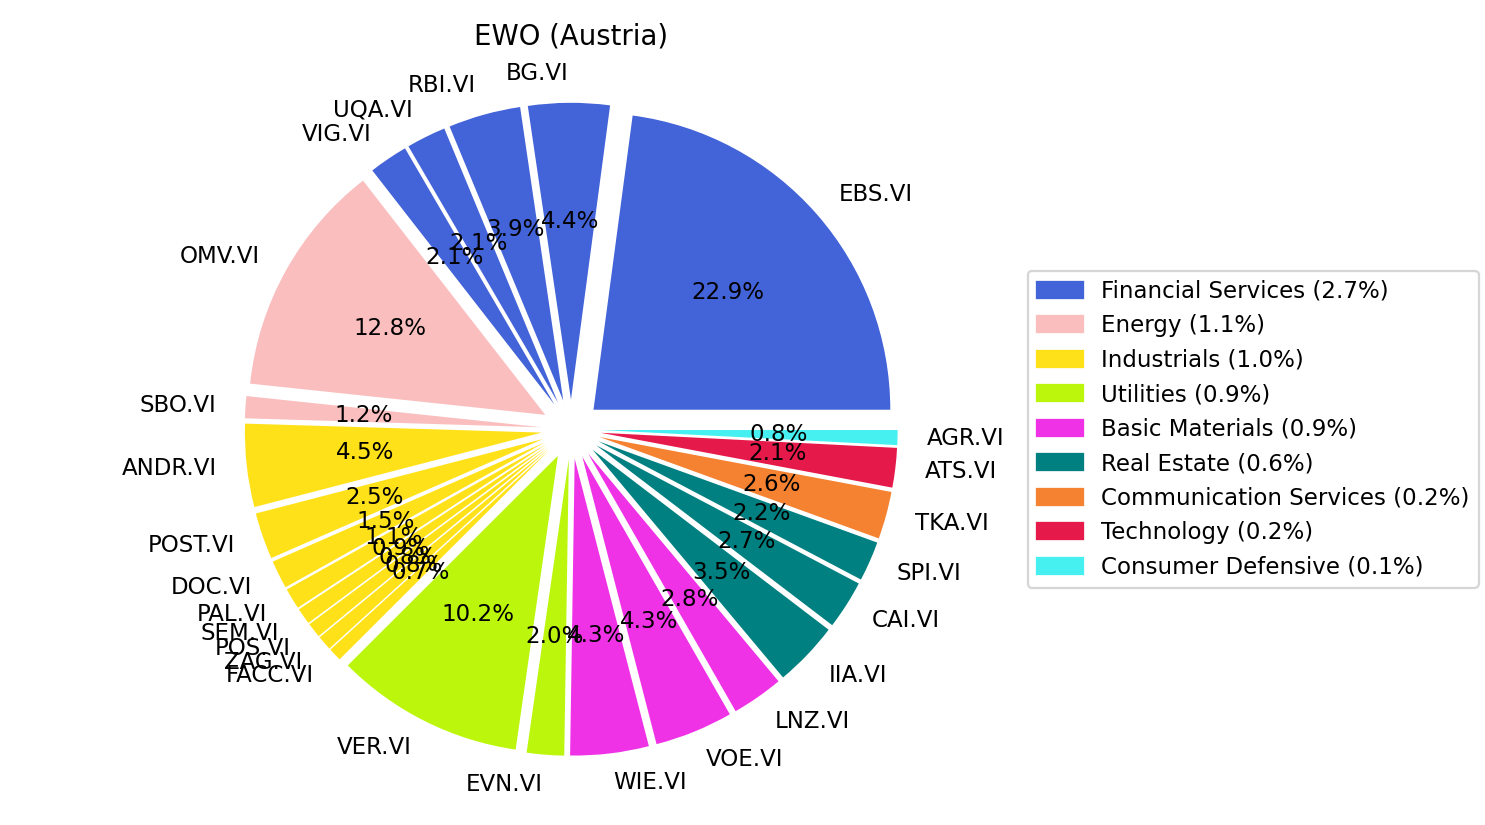

<IPython.core.display.Javascript object>


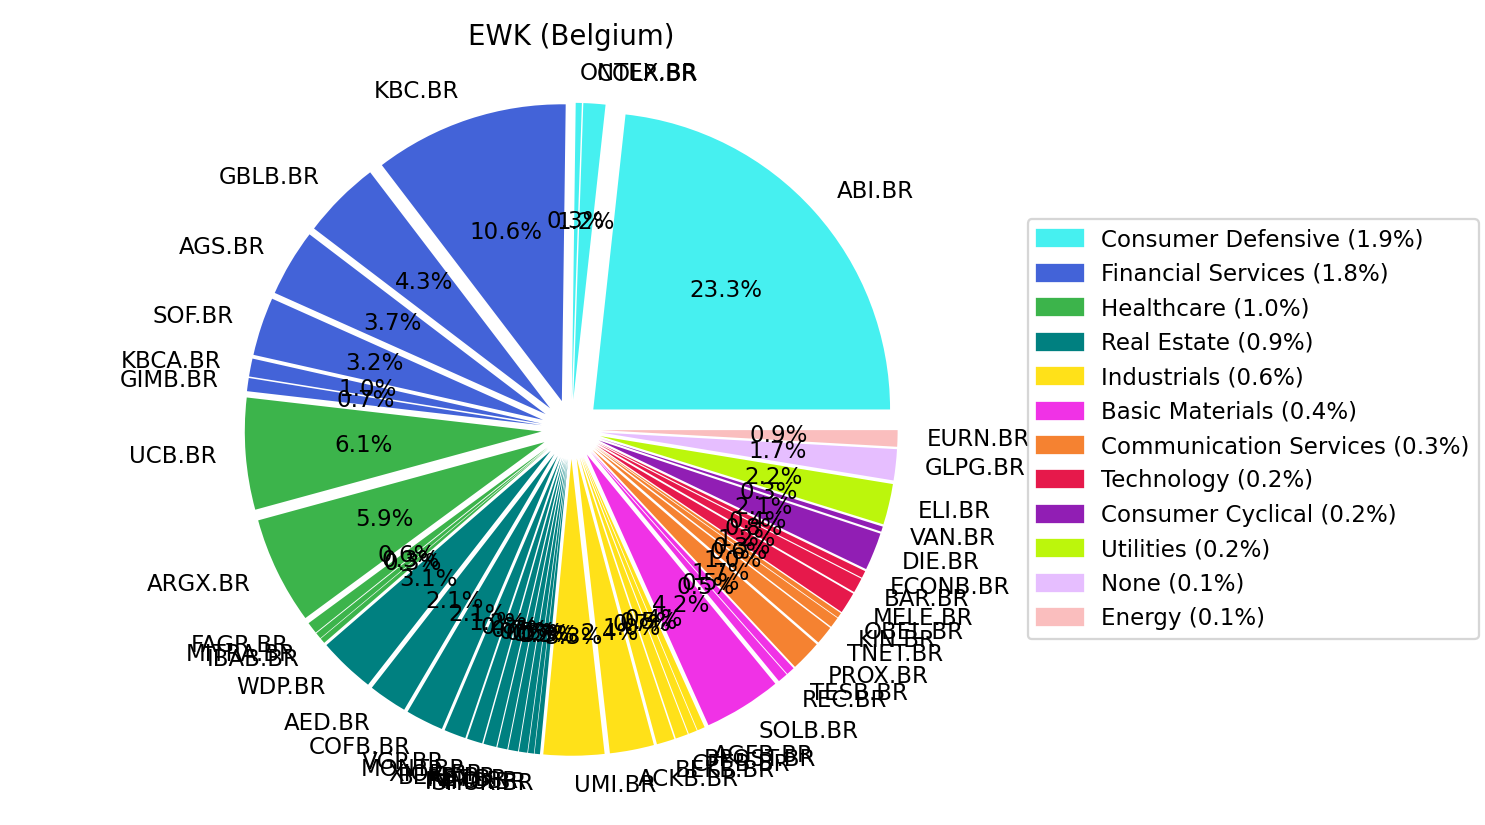

<IPython.core.display.Javascript object>


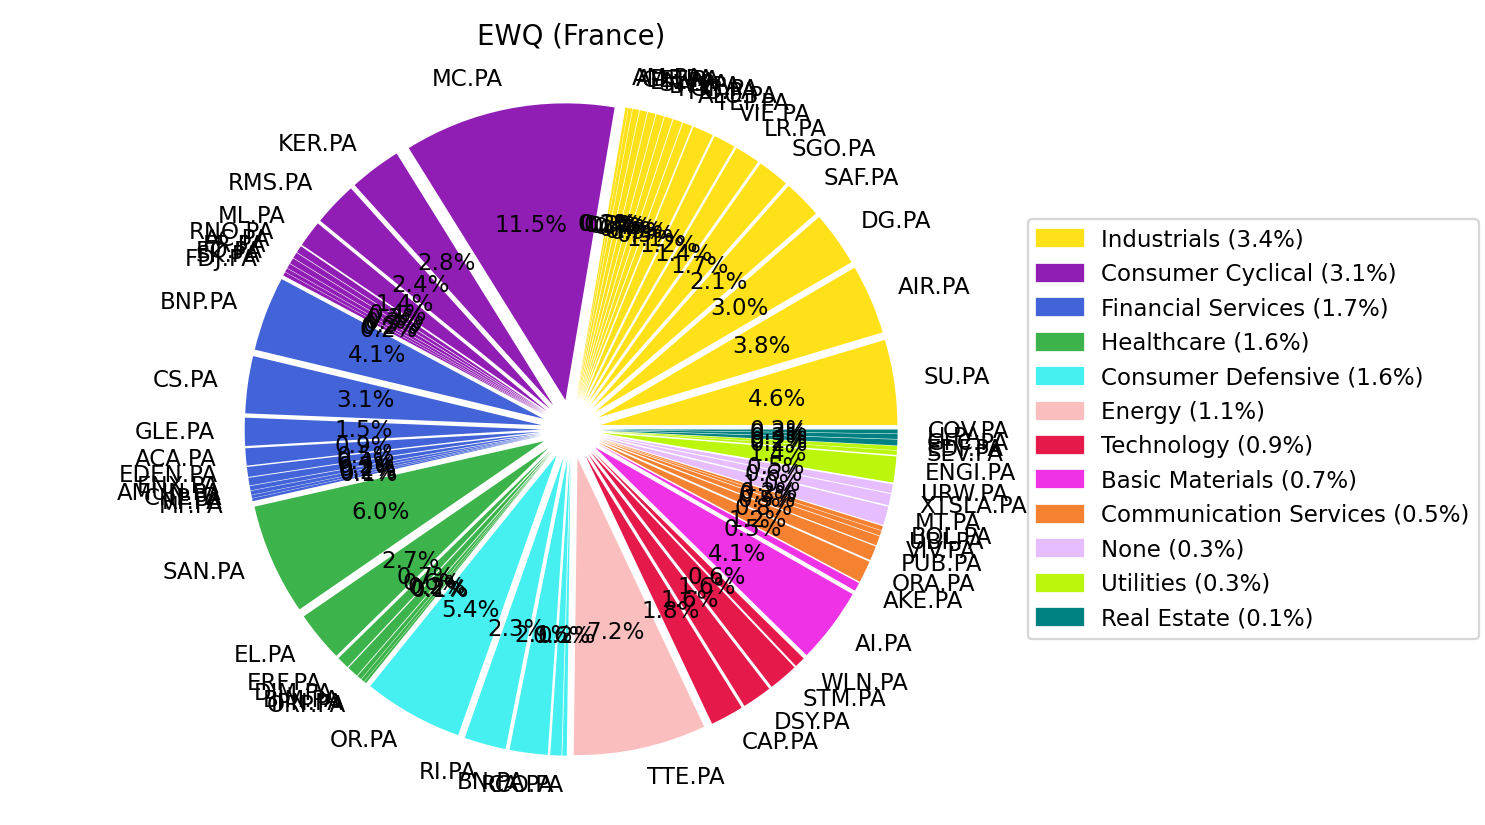

<IPython.core.display.Javascript object>


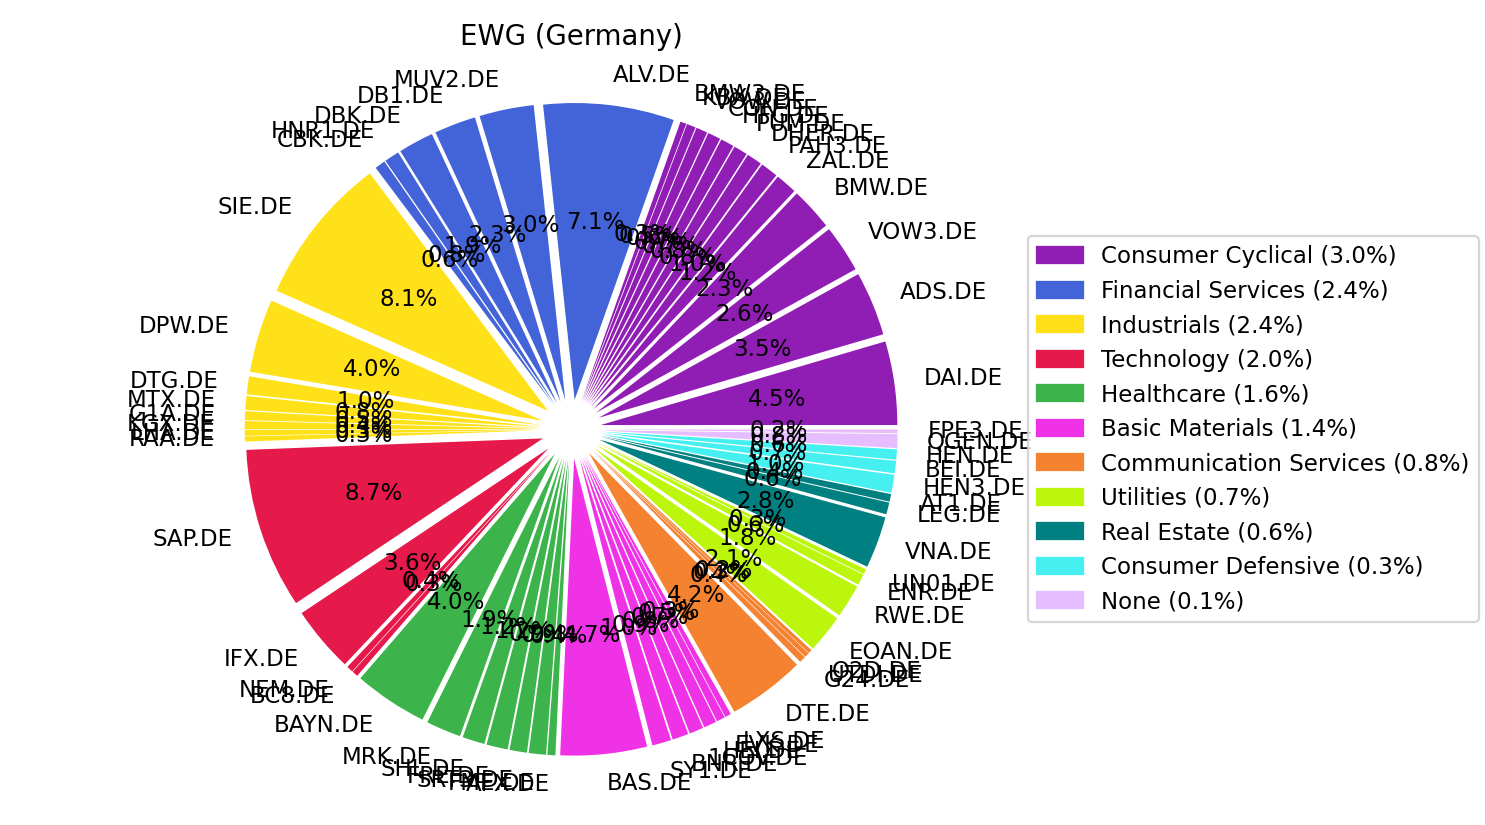

<IPython.core.display.Javascript object>


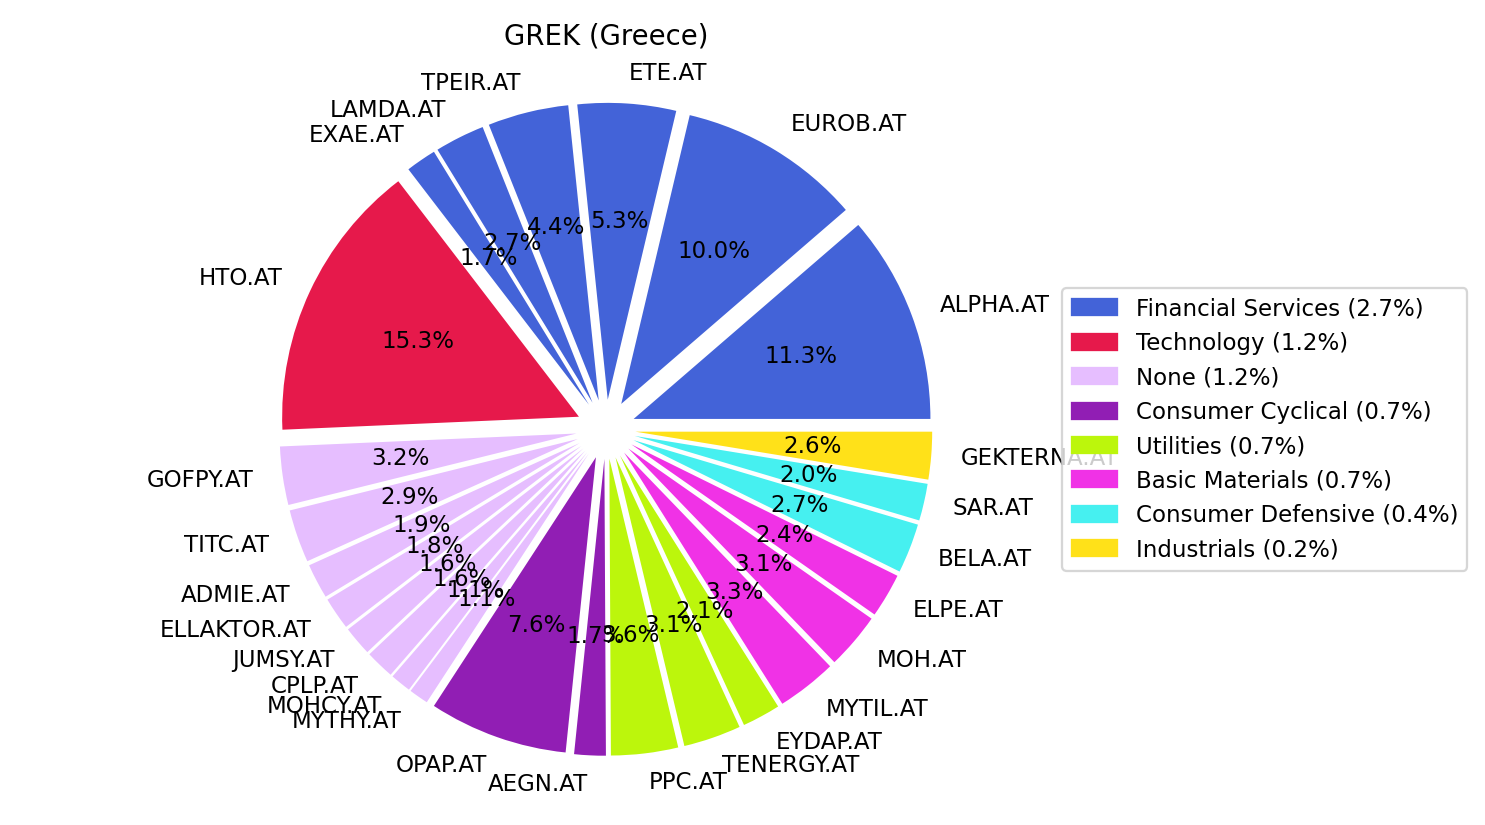

<IPython.core.display.Javascript object>


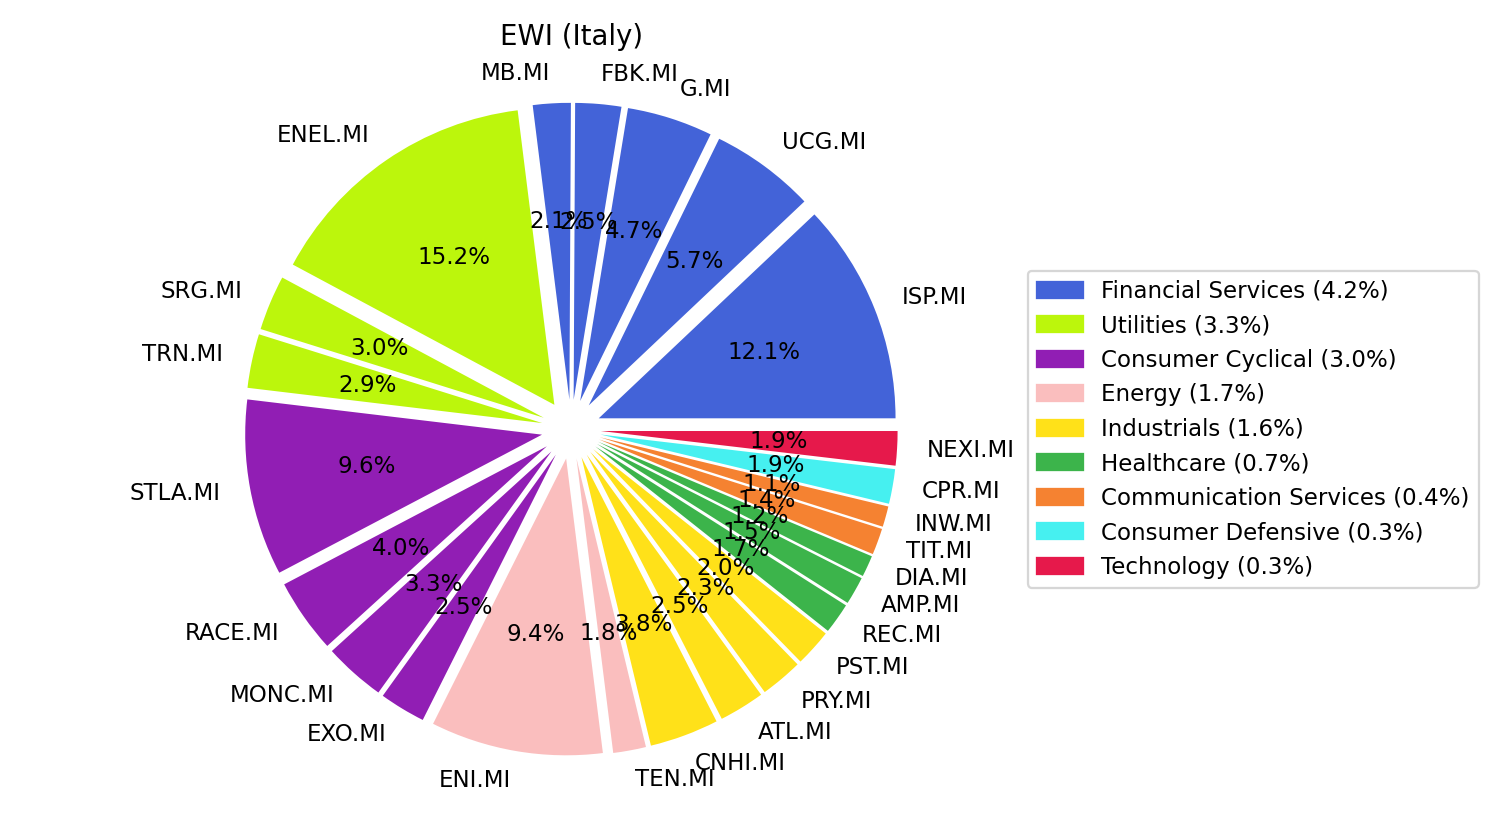

<IPython.core.display.Javascript object>


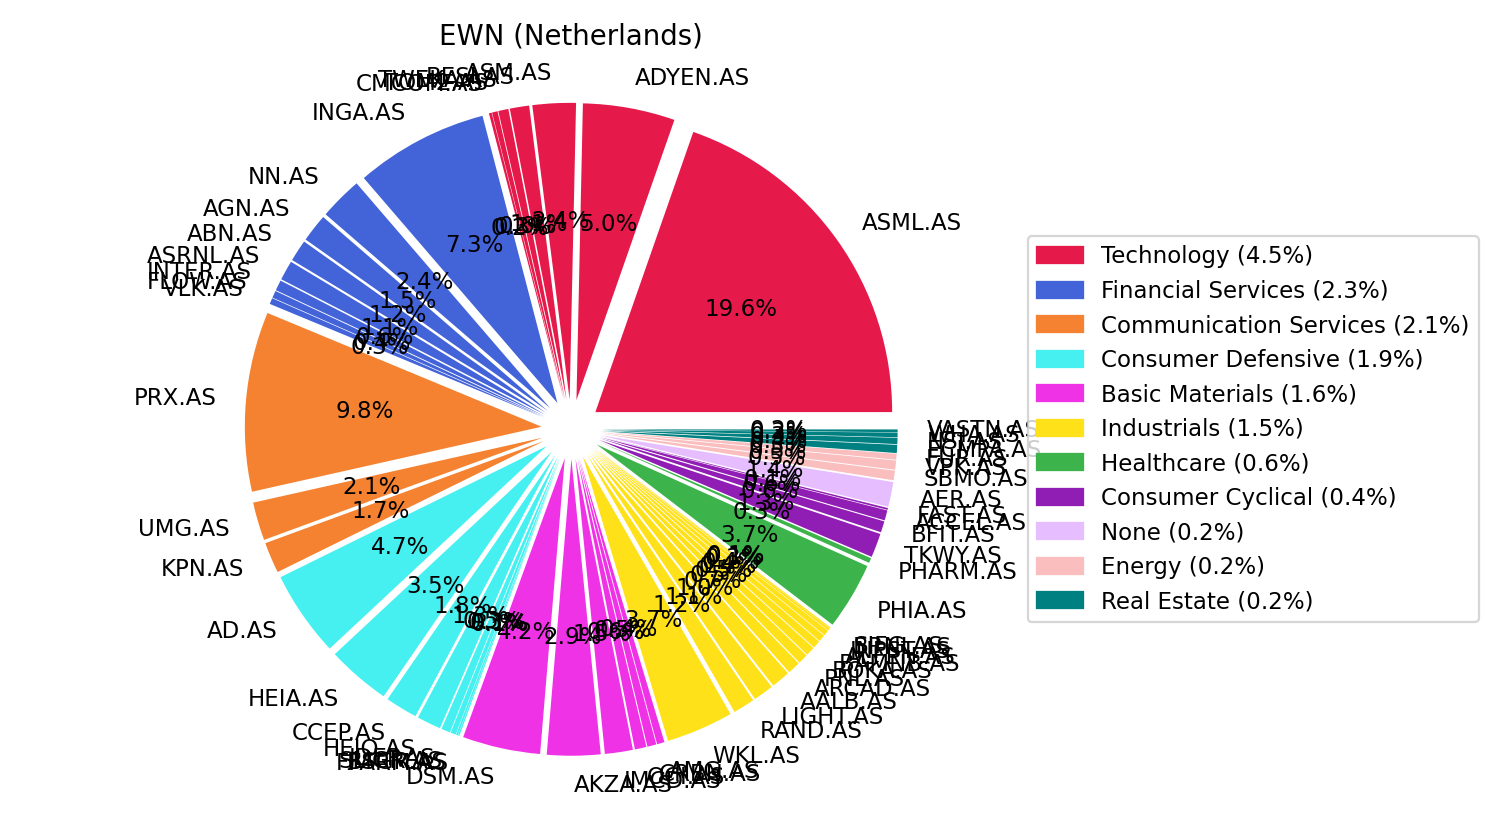

<IPython.core.display.Javascript object>


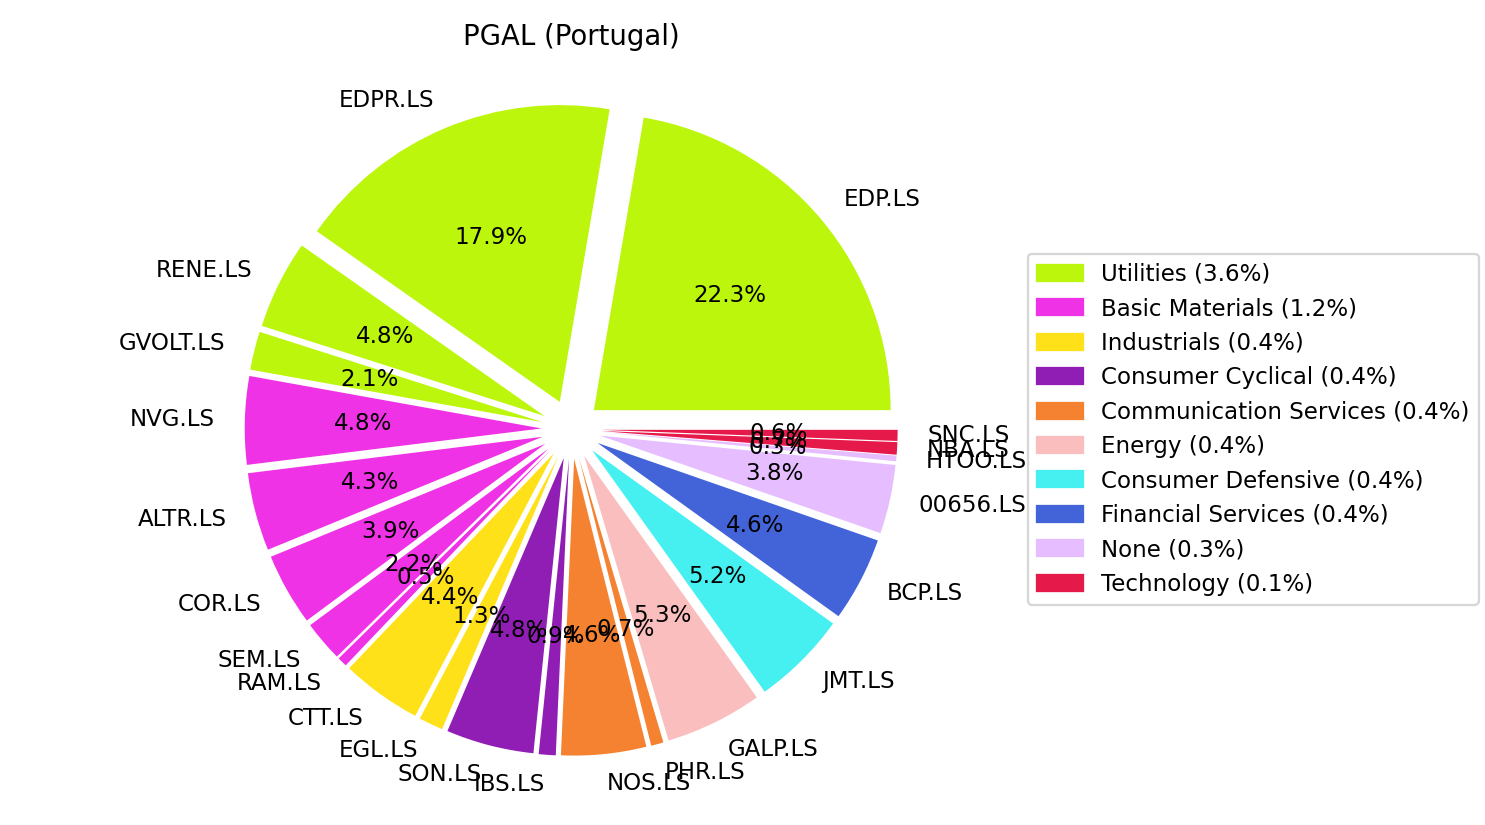

<IPython.core.display.Javascript object>


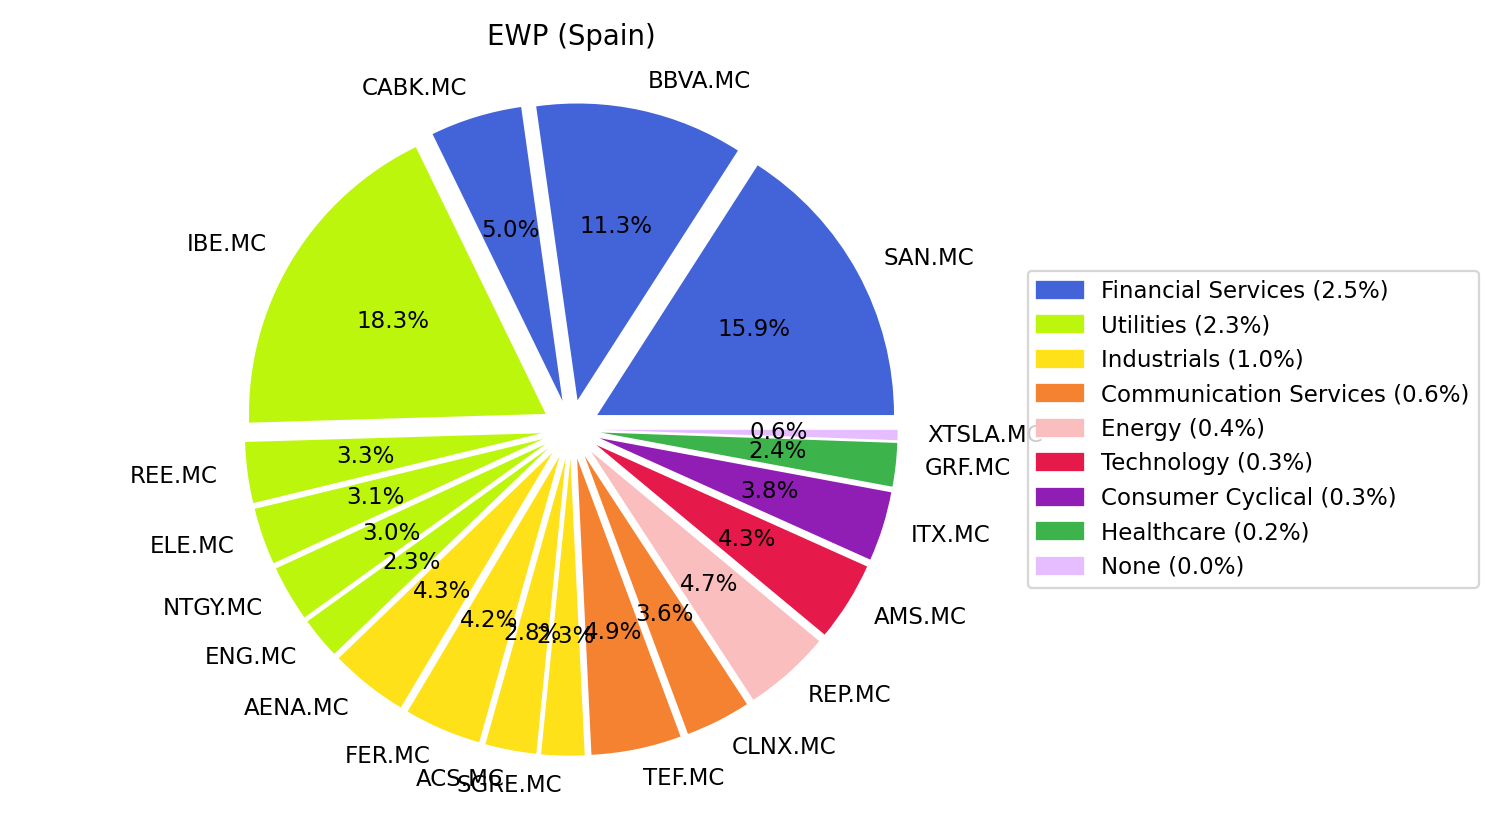

In [51]:
for etf in sorted(etfs, key=lambda e: e['country']):
    name, country, infos = etf['name'], etf['country'], etf['data']
    replace(infos, sector=sector_aliases);
    plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
    plt.title(f'{name} ({country})');
    plt.tight_layout();

In [42]:
# # sectors = group_cats(infos, 'sector', )
# # tot = sum(v for _, v in sectors)
# # sectors = [[k,v/tot] for k,v in sectors]
# # plot_pie(sectors, colors=seccolors);
# plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
# plt.title(f'{name} ({country})');
# plt.tight_layout();

In [47]:
# print(collate_group(infos, groupkey='industry'))

In [44]:
wts = {
    
    'EWG': 2.,
    'EWQ': 2.,
    
    'EWI': 2.,
    'EWN': 2.,
    
    'EWO': 1.,
    'EWK': 1.,
    'EWP': 1.,
    
    'GREK': 1.,
    'PGAL': 1.,
}

In [45]:
euro = []
mnorm = sum(wts.values())
for name, cache in CACHE.items():
    norm = 0.
    for base, info in zip(ETF[name], cache):
        info.update(base)
        norm += base.get('ratio', 0.)
    for item in cache:
        item['prefix'] = item['ticker'].split('.')[0]
        item['etf'] = name
        item['ratio'] = item['ratio'] / norm * wts[name] / mnorm
    euro.extend(cache)
len(euro)

353

In [33]:
sum(i['ratio'] for i in euro)

0.9999999999999998

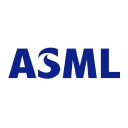

ASML.AS - ASML HOLDING

Sector: Technology
Industry: Semiconductor Equipment & Materials

Location: Veldhoven, Netherlands

Allocation: 3.0%
Yield: 1.3%

ASML Holding N.V.

ASML Holding N.V. develops, produces, markets, sells, and services advanced semiconductor equipment systems consisting
of lithography, metrology, and inspection related systems for memory and logic chipmakers. The company provides extreme
ultraviolet lithography systems; and deep ultraviolet lithography systems comprising immersion and dry lithography
solutions to manufacture various range of semiconductor nodes and technologies. It also offers metrology and inspection
systems, including YieldStar optical metrology solutions to measure the quality of patterns on the wafers; and HMI
e-beam solutions to locate and analyze individual chip defects. In addition, the company provides computational
lithography and software solutions to create applications that enhance the setup of the lithography system; and mature
product

In [48]:
item = find(euro, prefix='ASML')
profile, img = profile_item(item, 120)
display(img)
print(profile)

In [49]:
print(collate_group(euro, groupkey='sector'))

Sector                     Total  Components
----------------------  --------  -----------------
Financial Services      20.6493   ISP.MI    1.9%
                                  EBS.VI    1.8%
                                  SAN.MC    1.2%
                                  INGA.AS   1.1%
                                  ALV.DE    1.1%
                                  UCG.MI    0.9%
                                  ALPHA.AT  0.9%
                                  BBVA.MC   0.9%
                                  KBC.BR    0.8%
                                  EUROB.AT  0.8%
                                  G.MI      0.7%
                                  BNP.PA    0.6%
                                  CS.PA     0.5%
                                  MUV2.DE   0.5%
                                  ETE.AT    0.4%
                                  FBK.MI    0.4%
                                  CABK.MC   0.4%
                                  NN.AS     0.4%
                     

In [50]:
# plot_piece_pie(euro, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
# plt.title(f'Europe');
# plt.tight_layout();
print(collate_group(euro, groupkey='industry'))

Industry                                    Total  Components
--------------------------------------  ---------  -----------------
Banks—Regional                          8.8257     ISP.MI   1.9%
                                                   EBS.VI   1.8%
                                                   UCG.MI   0.9%
                                                   KBC.BR   0.8%
                                                   BNP.PA   0.6%
                                                   FBK.MI   0.4%
                                                   CABK.MC  0.4%
                                                   BCP.LS   0.4%
                                                   BG.VI    0.3%
                                                   MB.MI    0.3%
                                                   RBI.VI   0.3%
                                                   DBK.DE   0.3%
                                                   GLE.PA   0.2%
                        